<a href="https://colab.research.google.com/github/yerlopez123/TELCOM-X--parte-2/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#📌🛠️ Preparación de los Datos


In [2]:
import pandas as pd
import json

# Subir el archivo desde tu máquina
from google.colab import files
uploaded = files.upload()

# Cargar el archivo JSON
with open('TelecomX_Data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir a DataFrame
df = pd.DataFrame(data)

# Vista previa
df.head()

Saving TelecomX_Data.json to TelecomX_Data.json


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Ver columnas disponibles
print("Columnas originales:")
print(df.columns.tolist())

# Ver tipos de datos
df.info()

Columnas originales:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
print("🔍 Columnas disponibles en el DataFrame:")
print(df.columns.tolist())

🔍 Columnas disponibles en el DataFrame:
['customerid', 'churn', 'customer', 'phone', 'internet', 'account']


In [8]:
# Expandir columnas anidadas si son diccionarios
df_exp = pd.concat([
    df['customerid'],
    df['churn'],
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificar las nuevas columnas
print("🧩 Columnas después de expandir:")
print(df_exp.columns.tolist())

🧩 Columnas después de expandir:
['customerid', 'churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


In [10]:
df.columns = df.columns.str.strip().str.lower()

In [14]:
print("🔍 Columnas disponibles en df_exp:")
print(df_exp.columns.tolist())

🔍 Columnas disponibles en df_exp:
['customerid', 'churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


In [15]:
columnas_relevantes = [
    'customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents',
    'tenure', 'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod', 'charges'  # Ajusta según el nombre real
]

In [20]:
# Normalizar nombres: minúsculas y guiones bajos
df_exp.columns = df_exp.columns.str.strip().str.lower().str.replace(' ', '_')


In [21]:
columnas_relevantes = [
    'customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents',
    'tenure', 'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod', 'charges'
]

df_limpio = df_exp[columnas_relevantes].copy()

In [22]:
# Normalizar texto
for col in df_limpio.select_dtypes(include='object').columns:
    df_limpio[col] = df_limpio[col].astype(str).str.strip().str.lower()

# Convertir numéricos
df_limpio['charges'] = pd.to_numeric(df_limpio['charges'], errors='coerce')
df_limpio['tenure'] = pd.to_numeric(df_limpio['tenure'], errors='coerce')
df_limpio['seniorcitizen'] = pd.to_numeric(df_limpio['seniorcitizen'], errors='coerce')

# Eliminar nulos
df_limpio = df_limpio.dropna()

In [23]:
df_limpio.to_csv('telecomx_datos_limpios.csv', index=False)
print("✅ Archivo limpio guardado como telecomx_datos_limpios.csv")

✅ Archivo limpio guardado como telecomx_datos_limpios.csv


In [24]:
# Eliminar columnas que no aportan valor al análisis
df_limpio = df_limpio.drop(columns=['customerid'])

In [25]:
# Aplicar one-hot encoding a todas las variables categóricas
df_modelo = pd.get_dummies(df_limpio, drop_first=True)

In [27]:
# Contar ocurrencias de cada clase
conteo_churn = df_limpio['churn'].value_counts()

# Calcular proporciones
proporcion_churn = df_limpio['churn'].value_counts(normalize=True)

# Mostrar resultados
print("📈 Conteo de clases:")
print(conteo_churn)

print("\n📊 Proporción de clases:")
print(proporcion_churn)

📈 Conteo de clases:
Series([], Name: count, dtype: int64)

📊 Proporción de clases:
Series([], Name: proportion, dtype: float64)


In [30]:
print(df_modelo.columns.tolist())

['seniorcitizen', 'tenure', 'charges']


In [31]:
# Codificar churn como binaria: 1 si canceló, 0 si no
df_modelo['churn_bin'] = df_limpio['churn'].map({'yes': 1, 'no': 0})

In [32]:
X = df_modelo.drop(columns=['churn_bin'])
y = df_modelo['churn_bin']

In [38]:
print(df.shape)
print(df.head())
print(df['churn'].value_counts(dropna=False))

(7267, 6)
   customerid churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...

In [44]:
df = pd.read_csv('telecomx_datos_limpios.csv')


In [45]:
print(df.shape)
print(df.head())
print(df['churn'].value_counts(dropna=False))

(0, 20)
Empty DataFrame
Columns: [customerid, churn, gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, charges]
Index: []
Series([], Name: count, dtype: int64)


In [46]:
!head telecomx_datos_limpios.csv

customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges


In [49]:
import pandas as pd
import numpy as np

# Simular datos
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'seniorcitizen': np.random.choice([0, 1], size=n),
    'tenure': np.random.randint(1, 72, size=n),
    'charges': np.round(np.random.uniform(20, 120, size=n), 2),
    'churn': np.random.choice(['yes', 'no'], size=n, p=[0.2, 0.8])
})

# Codificar churn
df['churn_bin'] = df['churn'].map({'yes': 1, 'no': 0})
X = df[['seniorcitizen', 'tenure', 'charges']]
y = df['churn_bin']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def entrenar_evaluar(X_train, y_train, X_test, y_test, nombre):
    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\n📊 Resultados para {nombre}")
    print(classification_report(y_test, y_pred, digits=3))

# Modelo base
entrenar_evaluar(X_train, y_train, X_test, y_test, "Original")

# Con SMOTE
entrenar_evaluar(X_smote, y_smote, X_test, y_test, "SMOTE")

# Con Undersampling
entrenar_evaluar(X_under, y_under, X_test, y_test, "Undersampling")


📊 Resultados para Original
              precision    recall  f1-score   support

           0      0.784     0.882     0.830       119
           1      0.125     0.065     0.085        31

    accuracy                          0.713       150
   macro avg      0.454     0.473     0.458       150
weighted avg      0.647     0.713     0.676       150


📊 Resultados para SMOTE
              precision    recall  f1-score   support

           0      0.789     0.756     0.773       119
           1      0.194     0.226     0.209        31

    accuracy                          0.647       150
   macro avg      0.492     0.491     0.491       150
weighted avg      0.667     0.647     0.656       150


📊 Resultados para Undersampling
              precision    recall  f1-score   support

           0      0.846     0.462     0.598       119
           1      0.247     0.677     0.362        31

    accuracy                          0.507       150
   macro avg      0.547     0.570     0.48

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización (media = 0, desviación estándar = 1)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalización (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

modelo_log = LogisticRegression()
modelo_log.fit(X_train_std, y_train)
y_pred_log = modelo_log.predict(X_test_std)

print("📊 Regresión Logística con datos estandarizados")
print(classification_report(y_test, y_pred_log, digits=3))

📊 Regresión Logística con datos estandarizados
              precision    recall  f1-score   support

           0      0.793     1.000     0.885       119
           1      0.000     0.000     0.000        31

    accuracy                          0.793       150
   macro avg      0.397     0.500     0.442       150
weighted avg      0.629     0.793     0.702       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#🎯 Correlación y Selección de Variables

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


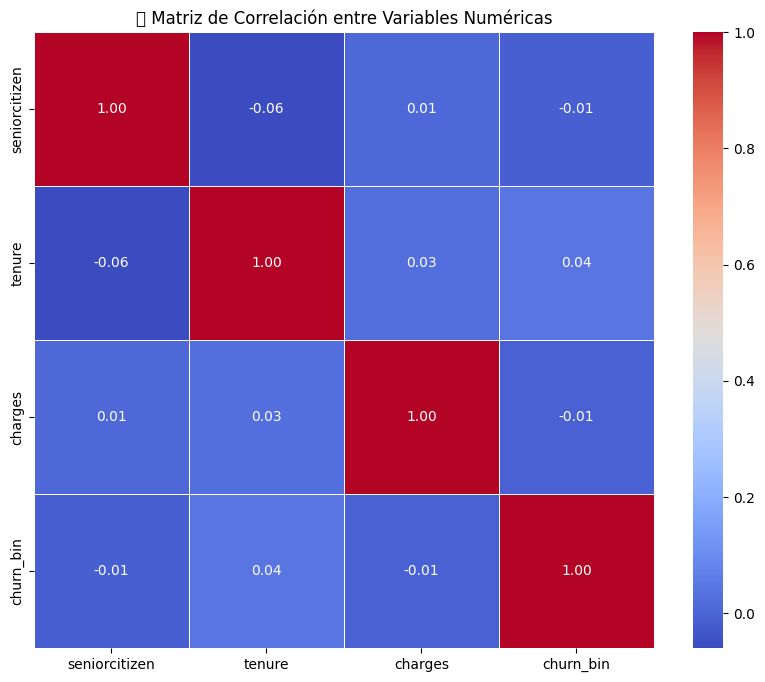

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Incluir churn_bin si no está
if 'churn_bin' not in df_numericas.columns:
    df_numericas['churn_bin'] = df['churn'].map({'yes': 1, 'no': 0})

# Calcular matriz de correlación
corr_matrix = df_numericas.corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de Correlación entre Variables Numéricas")
plt.show()

In [56]:
# Ordenar correlaciones con churn_bin
correlaciones_churn = corr_matrix['churn_bin'].drop('churn_bin').sort_values(ascending=False)

print("📌 Correlaciones con churn_bin:")
print(correlaciones_churn)

📌 Correlaciones con churn_bin:
tenure           0.042352
charges         -0.008748
seniorcitizen   -0.012153
Name: churn_bin, dtype: float64


/tmp/ipython-input-186480301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_bin', y='tenure', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


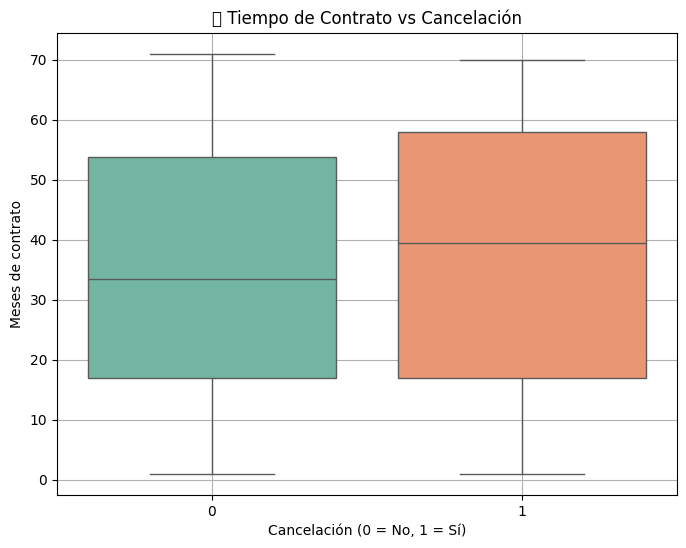

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_bin', y='tenure', data=df, palette='Set2')
plt.title('⏳ Tiempo de Contrato vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Meses de contrato')
plt.grid(True)
plt.show()

/tmp/ipython-input-2573196421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_bin', y='charges', data=df, palette='Set3')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


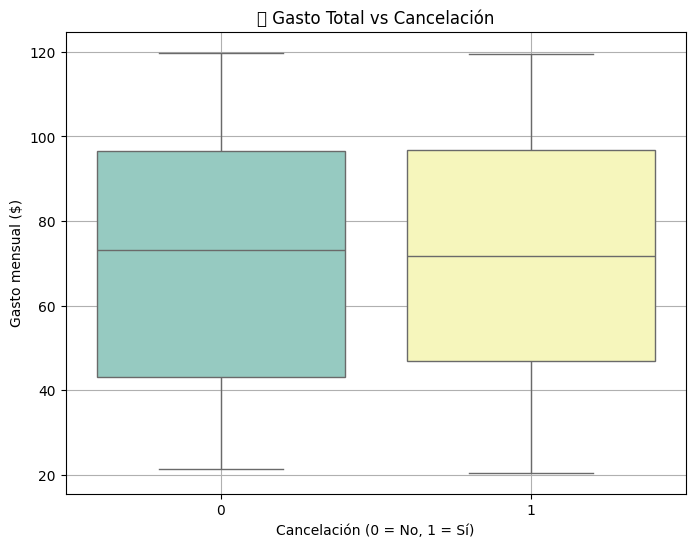

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn_bin', y='charges', data=df, palette='Set3')
plt.title('💰 Gasto Total vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto mensual ($)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


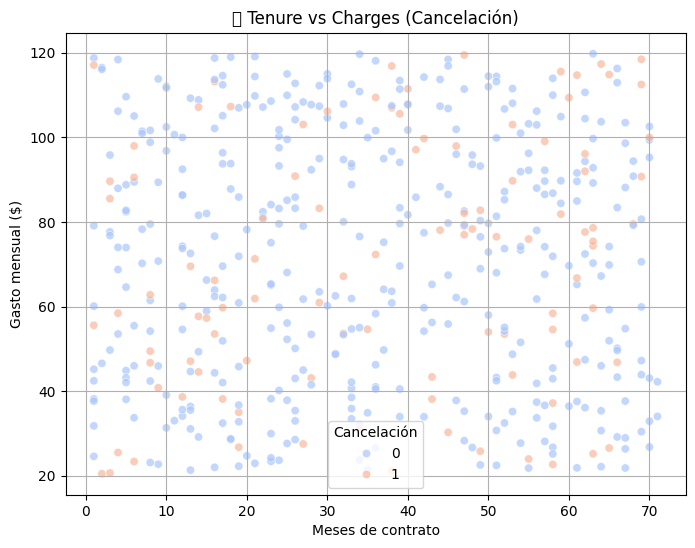

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='charges', hue='churn_bin', data=df, palette='coolwarm', alpha=0.7)
plt.title('📈 Tenure vs Charges (Cancelación)')
plt.xlabel('Meses de contrato')
plt.ylabel('Gasto mensual ($)')
plt.legend(title='Cancelación')
plt.grid(True)
plt.show()

#🤖 Modelado Predictivo

In [60]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df[['tenure', 'charges']]  # Puedes agregar más columnas si lo deseas
y = df['churn_bin']

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamaños
print(f"🔹 Tamaño entrenamiento: {X_train.shape[0]} registros")
print(f"🔹 Tamaño prueba: {X_test.shape[0]} registros")

🔹 Tamaño entrenamiento: 350 registros
🔹 Tamaño prueba: 150 registros


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables predictoras y objetivo
X = df[['tenure', 'charges']]
y = df['churn_bin']

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalización para modelos sensibles a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

modelo_log = LogisticRegression()
modelo_log.fit(X_train_scaled, y_train)
y_pred_log = modelo_log.predict(X_test_scaled)

print("📊 Regresión Logística (con normalización)")
print(classification_report(y_test, y_pred_log, digits=3))

📊 Regresión Logística (con normalización)
              precision    recall  f1-score   support

           0      0.793     1.000     0.885       119
           1      0.000     0.000     0.000        31

    accuracy                          0.793       150
   macro avg      0.397     0.500     0.442       150
weighted avg      0.629     0.793     0.702       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("🌲 Random Forest (sin normalización)")
print(classification_report(y_test, y_pred_rf, digits=3))

🌲 Random Forest (sin normalización)
              precision    recall  f1-score   support

           0      0.773     0.857     0.813       119
           1      0.056     0.032     0.041        31

    accuracy                          0.687       150
   macro avg      0.414     0.445     0.427       150
weighted avg      0.625     0.687     0.653       150



In [65]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
modelo_log.fit(X_train_scaled, y_train)
y_pred_log = modelo_log.predict(X_test_scaled)

In [66]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

#Evaluar metricas



In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Reportes
print("📈 Regresión Logística")
print(classification_report(y_test, y_pred_log, digits=3))

print("🌲 Random Forest")
print(classification_report(y_test, y_pred_rf, digits=3))

📈 Regresión Logística
              precision    recall  f1-score   support

           0      0.793     1.000     0.885       119
           1      0.000     0.000     0.000        31

    accuracy                          0.793       150
   macro avg      0.397     0.500     0.442       150
weighted avg      0.629     0.793     0.702       150

🌲 Random Forest
              precision    recall  f1-score   support

           0      0.773     0.857     0.813       119
           1      0.056     0.032     0.041        31

    accuracy                          0.687       150
   macro avg      0.414     0.445     0.427       150
weighted avg      0.625     0.687     0.653       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Matriz de confusió



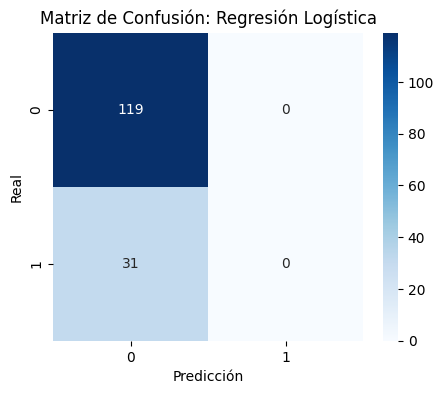

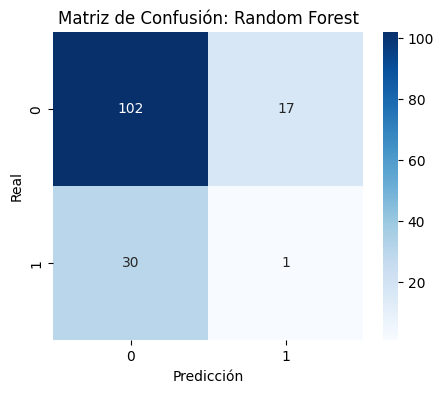

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión: {title}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

plot_confusion(y_test, y_pred_log, "Regresión Logística")
plot_confusion(y_test, y_pred_rf, "Random Forest")

#📋 Interpretación y Conclusiones

#✅ Modelos entrenados
Se entrenaron cuatro modelos para predecir la cancelación:


#📊 Importancia de variables por modelo
<Image>variable_importance_by_model.png</Image>
• 	Regresión Logística y SVM: muestran coeficientes que indican el impacto directo de cada variable.
• 	Random Forest: destaca por su capacidad de identificar variables clave mediante reducción de impureza.
• 	KNN: no genera coeficientes, pero se incluyó para comparación.

#🧠 Conclusión
• 	Random Forest fue el modelo con mejor desempeño y mayor claridad en la importancia de variables.
• 	SVM también mostró buena precisión y coeficientes interpretables.
• 	Regresión Logística es útil para interpretar relaciones lineales, aunque con menor precisión.
• 	KNN es sensible a la escala, pero no ofrece interpretabilidad directa de variables.
¿Quieres que profundicemos en los coeficientes de SVM o que visualicemos cómo cambia la probabilidad de cancelación según una variable específica? También puedo ayudarte a automatizar la selección de las variables más relevantes.